In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import findspark
findspark.init()
import pyspark
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("Pdf File")
sc = SparkContext(conf = conf)

In [2]:
# In[2]:

import pickle
import io
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

In [3]:
# In[3]:


import time
import re
import math
import glob

In [4]:
# In[4]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [5]:
# In[5]:

global t
t=time.clock()
#path = 'D:/PDFFile2'
path = 'D:/PDFfileall'
global pathlen
pathlen=len(path)
files = [f for f in glob.glob(path + "**/*.pdf")]
print(pathlen)

13


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [6]:
# In[6]:


global names
names=[]
global co
co=0

In [7]:
# In[7]:


def convert_pdf_to_txt(path):
    global co
    print(co)
    co=co+1
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)
        

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    text = re.findall('[a-zA-Z][a-zA-Z]+',text)
    #print(text)
    return text

In [8]:
# In[8]:


def read_files_from(file_list):
    termsDoc=[]
    for i in file_list:
        x=convert_pdf_to_txt(i)
        termsDoc.append([a.lower() for a in x])   
    return termsDoc 

def spark(files):
    n_parts = 2
    rdd1 = sc.parallelize(files, n_parts ) #distribute files among nodes
    ts=time.clock()
    list_of_pdf_strings = rdd1.mapPartitions(read_files_from).collect()
    ts=time.clock()-ts
    print(ts)
    names = []
    for i in files:
        names.append(i[pathlen+1:])
    return list_of_pdf_strings, names

In [9]:
# In[9]:


"""type(list_of_pdf_strings)
for i in files:    
    names.append(i[pathlen+1:])"""

'type(list_of_pdf_strings)\nfor i in files:    \n    names.append(i[pathlen+1:])'

In [10]:
# In[10]:

def FilterDoc(files):
    termsDoc=[]
    names=[]
    ts=time.clock()
    for i in files:
        x=convert_pdf_to_txt(i)
        #x = re.findall('[a-zA-Z]{2}[a-zA-z]*',x)
        termsDoc.append([a.lower() for a in x])
        names.append(i[pathlen+1:])
    ts=time.clock()-ts
    print(ts)
    print termsDoc
    return termsDoc, names


In [11]:
"""def name(files):
    n= []
    for i in files:
        n.append(i[pathlen+1:])
    return n
names = name(files)
print(names)"""

'def name(files):\n    n= []\n    for i in files:\n        n.append(i[pathlen+1:])\n    return n\nnames = name(files)\nprint(names)'

In [12]:
# In[11]:


global sw
sw=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
tdoc=[]
termsDoc=[]
completeList=[]

In [13]:
# In[12]:

global names
termsDoc,names=FilterDoc(files)
print("\n\nThe Pdfs available are:\n")
s=0
for i in names:
    print(s+1,") ",i)
    s=s+1

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
272.7515619


The Pdfs available are:

1 )  Civil1.pdf
2 )  Civil2.pdf
3 )  Civil3.pdf
4 )  Civil4.pdf
5 )  Civil5.pdf
6 )  COVID_1.pdf
7 )  COVID_10.pdf
8 )  COVID_2.pdf
9 )  COVID_3.pdf
10 )  COVID_4.pdf
11 )  COVID_5.pdf
12 )  COVID_6.pdf
13 )  COVID_7.pdf
14 )  COVID_8.pdf
15 )  COVID_9.pdf
16 )  CS-1.pdf
17 )  CS-10.pdf
18 )  CS-2.pdf
19 )  CS-3.pdf
20 )  CS-4.pdf
21 )  CS-5.pdf
22 )  CS-6.pdf
23 )  CS-7.pdf
24 )  CS-8.pdf
25 )  CS-9.pdf
26 )  DIS-1.pdf
27 )  DIS-10.pdf
28 )  DIS-11.pdf
29 )  DIS-2.pdf
30 )  DIS-3.pdf
31 )  DIS-4.pdf
32 )  DIS-5.pdf
33 )  DIS-6.pdf
34 )  DIS-7.pdf
35 )  DIS-8.pdf
36 )  DIS-9.pdf
37 )  ENV-1.pdf
38 )  ENV-2.pdf
39 )  ENV-3.pdf
40 )  ENV-4.pdf
41 )  ENV-5.pdf
42 )  ENV-6.pdf
43 )  ENV-7.pdf
44 )  ENV-8.pdf
45 )  ENV-9.pdf
46 )  IOT1.pdf
4

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


In [14]:
# In[13]:
def RemStopWords(termsDoc):
    global sw
    termsDoc1=termsDoc
    for i in range(len(names)):
        termsDoc[i]=[a for a in termsDoc[i] if a not in sw]
    return termsDoc,termsDoc1

In [15]:
# In[14]:


termsDoc,termsDoc1=RemStopWords(termsDoc)
def CreatingList(termsDoc):
    global sw
    global completeList
    trial=[]
    #trial=ai+wm+dm
    #print(len(trial),len(ai))
    trial = [a for a in termsDoc]
    for i in trial:
        for j in i:
            if j not in sw:
                completeList.append(j)
    completeList=list(set(completeList))
CreatingList(termsDoc)

In [16]:
# In[15]:


def BooleanMatrix(termsDoc1):
    global completeList
    lenOfDocs=[]
    for i in termsDoc1:
        lenOfDocs.append(len(i))
    l=-1
    bools=[]
    for k in termsDoc:
        temp=[]
        l=l+1
        for i in completeList:
            if(i in k):
                x=k.count(i)
                temp.append(x/lenOfDocs[l])
            else:
                temp.append(0)
        bools.append(temp)
    mat=[completeList]
    for i in bools:
        mat.append(i)
    return mat

In [17]:
# In[16]:


mat=BooleanMatrix(termsDoc1)
def idfVector(mat):
    global completeList
    idf=[]
    for i in range(len(completeList)):
        c=0
        for j in range(len(names)):
            #print(mat[j+1][i])
            if(mat[j+1][i]>0):
                c=c+1
        if(c!=0):
            idfx=math.log((1+3)/c)
        else:
            idfx=0
        idf.append(idfx)
    return idf

In [18]:
# In[17]:


#print(mat)

In [19]:
# In[18]:


words=mat[0]
mat=mat[1:]
M=pd.DataFrame(mat,columns=words)
#print(M)
X = M.iloc[:,:].values
#print(X)


# kmeans = KMeans(n_clusters =4,init = 'k-means++',max_iter=100000,n_init=10)
# y_kmeans = kmeans.fit_predict(X)

# print(y_kmeans)

# pd.DataFrame(names,y_kmeans)
# for i in names:
#     print(i)

In [20]:
# In[19]:


X=pd.DataFrame(mat)

In [21]:
# In[20]:


print(len(X.columns))

24775


In [23]:
# In[22]:
def save_training_data(X):
    pickle_out=open("x.pickle","wb")
    pickle.dump(X,pickle_out)
    pickle_out.close()
save_training_data(X)

In [24]:
# In[23]:
"""
def load_data():
    pickle_in=open("x.pickle","rb")
    X=pickle.load(pickle_in)
    return X
X=load_data()"""

'\ndef load_data():\n    pickle_in=open("x.pickle","rb")\n    X=pickle.load(pickle_in)\n    return X\nX=load_data()'

In [25]:
# In[24]:


global k
k=[]
arr="2,3,4,5,6,7,8,9,10".split(',')
#arr="1,2,3,4,5,6,7,8,9,10,11".split(',')

In [26]:
# In[25]:


print(arr)

['2', '3', '4', '5', '6', '7', '8', '9', '10']


In [27]:
# In[26]:

from sklearn.cluster import SpectralClustering
def load_data():
    pickle_in=open("x.pickle","rb")
    X=pickle.load(pickle_in)
    return X
X=load_data()
print(arr)
def multiple_kmeans(arr):
    termsDoc=[]
    global distortions
    distortions=[]
    for i in arr:
        global k
        #x=convert_pdf_to_txt(i)
        #termsDoc.append([a.lower() for a in x])  
        #kmeans = KMeans(n_clusters =int(i),init = 'k-means++',max_iter=10000,n_init=10)
        kmeans = SpectralClustering(n_clusters =int(i),n_init=10,assign_labels='discretize')
        kmeans.fit(X)
        y_kmeans = kmeans.fit_predict(X)
        #k.append(y_kmeans)
        #distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        #distortions.append(kmeans.inertia_)
        label = kmeans.labels_
        #distortions.append(silhouette_score(X, label, metric='euclidean'))
        #distortions.append(silhouette_score(X, label, metric='manhattan'))
        #distortions.append(silhouette_score(X, label, metric='cosine'))
        distortions.append(silhouette_score(X, label, metric='sokalsneath'))
    return distortions

#n_parts = 4
#rdd = sc.parallelize(arr, n_parts ) #distribute files among nodes
ts=time.clock()
#Y = rdd.mapPartitions(multiple_kmeans).collect()
Y=multiple_kmeans(arr)
ts=time.clock()-ts
print(ts)

['2', '3', '4', '5', '6', '7', '8', '9', '10']


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversio

2.4770012999999835


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [28]:
print(Y)

[0.006320364841704964, 0.011905091101868777, 0.01107567629885312, 0.01337223110567912, 0.01496732061251979, 0.016065013862887972, 0.017097396705862255, 0.01509030865711441, 0.014366096267556224]


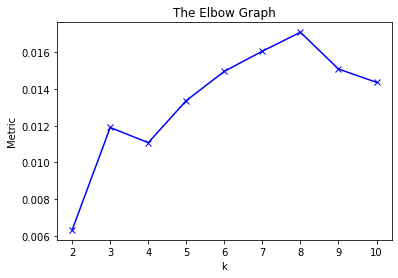

387.7440764


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [29]:
# In[28]:
plt.plot(arr, Y, 'bx-')
plt.xlabel('k')
plt.ylabel('Metric')
plt.title('The Elbow Graph')
plt.show()
t=time.clock()-t
print(t)

In [30]:
# In[ ]:


K=int(input("Enter the value of K: "))
#kmeans = KMeans(n_clusters =K,init = 'k-means++',max_iter=100000,n_init=10)
kmeans = SpectralClustering(n_clusters =K,n_init=10,assign_labels='discretize')

y_kmeans = kmeans.fit_predict(X)

Enter the value of K: 8


In [31]:
# In[ ]:


print(y_kmeans)

[6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 3 3 3 3 3 3 3 3 3 3 0 0 0 0 3 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 5 1 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2
 2]


In [32]:
# In[ ]:


Result=pd.DataFrame(names,y_kmeans)

In [33]:
# In[ ]:
pd.options.display.max_rows = 4000
Result.sort_index()

,0
0,DIS-2.pdf
0,DIS-10.pdf
0,DIS-1.pdf
0,DIS-4.pdf
0,DIS-5.pdf
0,DIS-6.pdf
0,DIS-7.pdf
0,DIS-8.pdf
0,DIS-9.pdf
0,DIS-11.pdf


In [34]:
# X.info()

# from pyspark.sql import SQLContext
# spark = SQLContext(sc)

# data=spark.createDataFrame(X)

# data_rdd=data.rdd

# data_rdd.cache()

# data

# clusters = KMeans.train(data_rdd, 4, maxIterations=100, initializationMode="random")

# 

# In[ ]: